## Метод прогонки

Уравнение:

$u'' + ch(x)u' + sh(x)u = ch(x) + xsh(x)$; $0<x<1$

Граничные словия:

$u'(0) = 0$  

$6u(1) + u'(1) = 8.3761 $

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation

## Начальные данные

In [14]:
h = 0.05
a = 0
b = 1

g_a = 0
n_a = 1
y_a = 0

g_b = 6
n_b = 1
y_b = 8.3761

In [15]:
def p(x):
    return np.cosh(x)

def q(x):
    return np.sinh(x)

def f(x):
    return np.cosh(x) + x * np.sinh(x)

def sol(x):
    return np.exp(-np.sinh(x)) + x

## 1 порядок

In [16]:
def progon_1(h_t):
    
    N = int((b - a)/h_t)
    x_lin_ = np.linspace(a, b, num = N + 1)

    A, B, C = get_T_1(h_t, x_lin_, N)

    D = get_D_1(h_t, x_lin_, N)
    
    a_l, b_l = tuda(A, B, C, D, N)
    
    return obratno(B[-1], C[-1], D[-1], a_l, b_l, N)

## 2 порядок

In [17]:
def progon_2(h_t):
    
    N = int((b - a)/h_t)
    x_lin_ = np.linspace(a, b, num = N + 1)
    
    A, B, C = get_T_2(h_t, x_lin_, N)

    D = get_D_2(h_t, x_lin_, N)
    
    a_l, b_l = tuda(A, B, C, D, N)
    
    return obratno(B[-1], C[-1], D[-1], a_l, b_l, N)

## Коэффициенты матрицы системы

In [18]:
def get_T_1(h, x_lin, N):
    
    A = np.zeros(N + 1)
    A[0] = g_a - n_a/h
    A[1:N] = np.array(1/h**2 - p(x_lin[1:-1])/2/h)
    A[-1] = 0

    B = np.zeros(N + 1)
    B[0] = n_a/h
    B[1:N] = np.array(-2/h**2 + q(x_lin[1:-1]))
    B[-1] = -n_b/h

    C = np.zeros(N + 1)
    C[0] = 0
    C[1:N] = np.array(1/h**2 + p(x_lin[1:-1])/2/h)
    C[-1] = g_b + n_b/h

    return A, B, C

def get_D_1(h, x_lin, N):
    
    N = int((b - a)/h)
    D = np.zeros(N + 1)
    D[0] = y_a
    D[1:N] = np.array(f(x_lin[1:-1]))
    D[-1] = y_b
    
    return D

def get_T_2(h, x_lin, N):
    
    N = int((b - a)/h)
    A = np.zeros(N + 1)
    A[0] = g_a - n_a*(2 - q(x_lin[0])*h*h)/(2 - h*p(x_lin[0]))/h
    A[1:N] = np.array(1/h**2 - p(x_lin[1:-1])/2/h)
    A[-1] = 0

    B = np.zeros(N + 1)
    B[0] = n_a*(1 + (2 + p(x_lin[0])*h)/(2 - p(x_lin[0])*h))/2/h
    B[1:N] = np.array(-2/h**2 + q(x_lin[1:-1]))
    B[-1] = -n_b*(1 + (2 - p(x_lin[-1])*h)/(2 + p(x_lin[-1])*h))/2/h

    C = np.zeros(N + 1)
    C[0] = 0
    C[1:N] = np.array(1/h**2 + p(x_lin[1:-1])/2/h)
    C[-1] = g_b + n_b*(2 - q(x_lin[-1])*h*h)/h/(2 + h*p(x_lin[-1]))

    return A, B, C

def get_D_2(h, x_lin, N):
    
    N = int((b - a)/h)
    D = np.zeros(N + 1)
    D[0] = y_a + n_a*h*f(x_lin[0])/(2 - h*p(x_lin[0]))
    D[1:N] = np.array(f(x_lin[1:-1]))
    D[-1] = y_b - n_b*h*f(x_lin[-1])/(2 + h*p(x_lin[-1]))
    
    return D

## Прямой ход прогонки

In [19]:
def tuda(A, B, C, D, N):
    a, b = [-B[0]/A[0]], [D[0]/A[0]]

    for i in range(1, N):
        b.append((D[i] - A[i]*b[-1])/(A[i]*a[-1] + B[i]))
        a.append(-C[i]/(A[i]*a[-1] + B[i]))
    
    return a, b

## Обратный ход прогонки

In [20]:
def obratno(B, C, D, a, b, N):
    f_prog = [(D - B*b[-1])/(B*a[-1] + C)]

    for i in range(N-1, -1, -1):
        f_prog.append(f_prog[-1] * a[i] + b[i])

    f_prog.reverse()
    
    return f_prog

## Визуализация

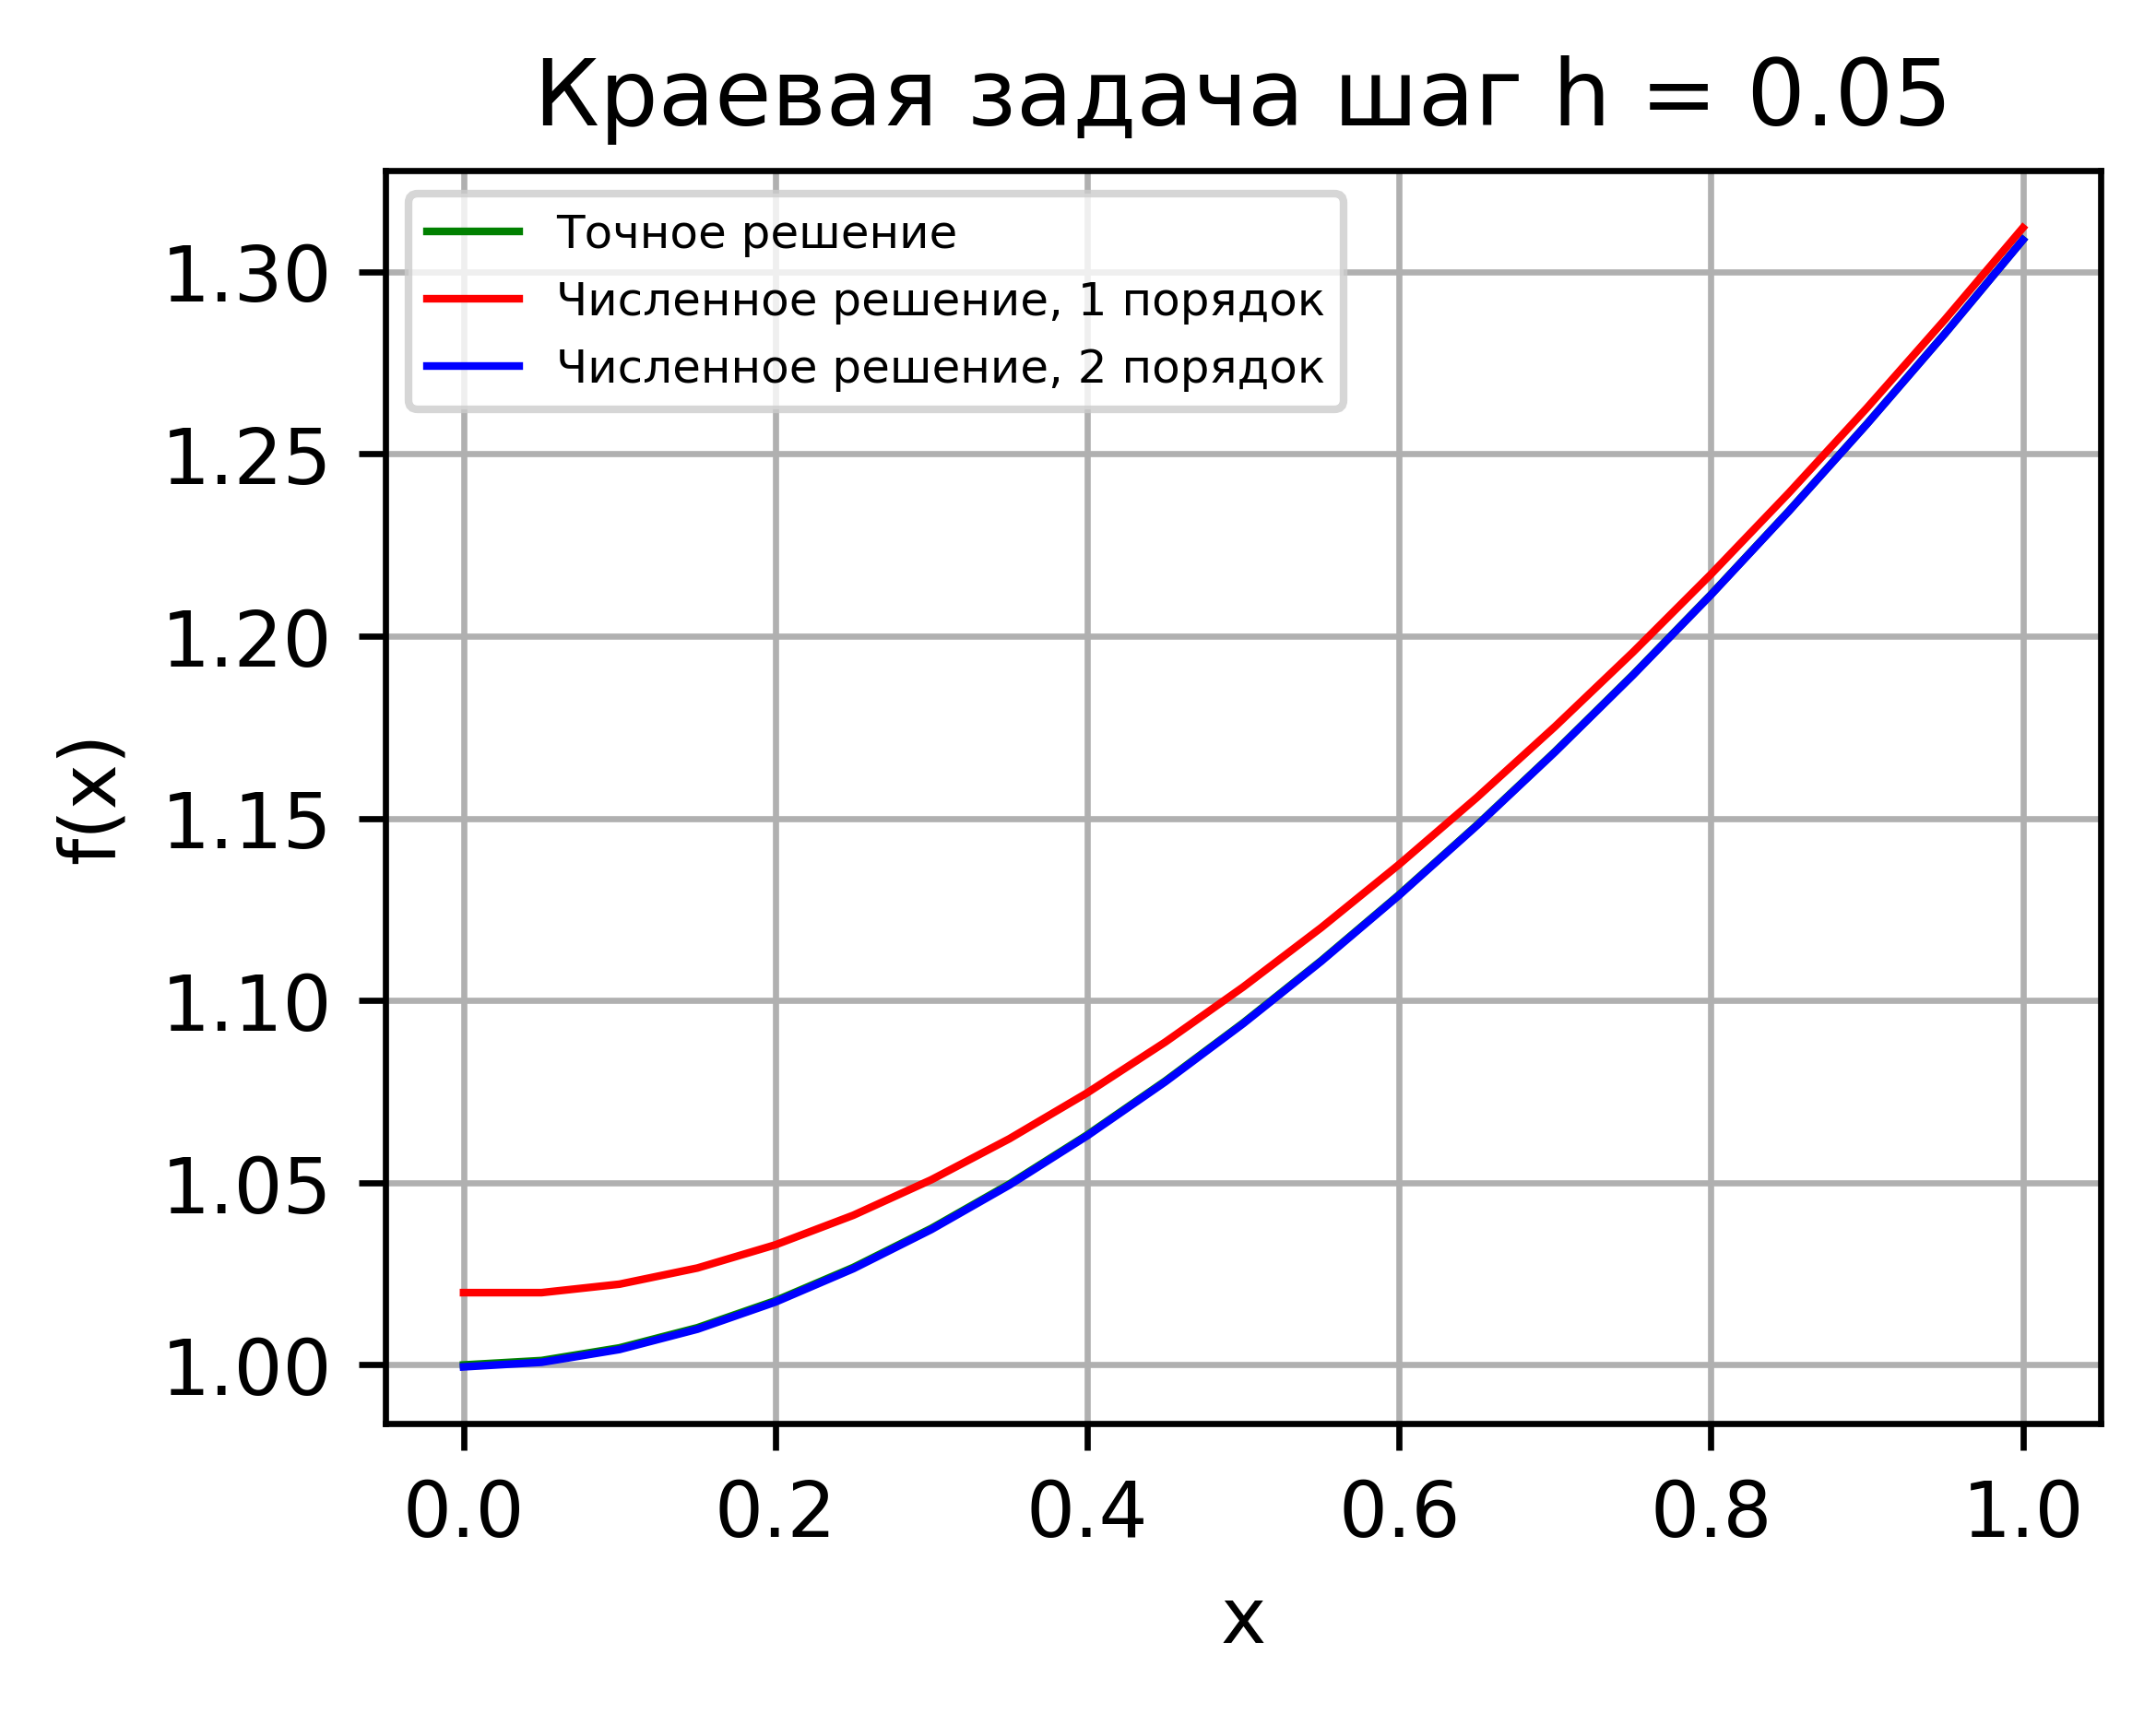

In [21]:
plt.figure(figsize = (4, 3),dpi = 600)

N = int((b - a)/h)
x_vis = np.linspace(a, b, num = N + 1)

plt.plot(x_vis, sol(x_vis), c = 'g', label = 'Точное решение', lw = 1.)
plt.plot(x_vis, progon_1(h), c = 'r',\
         label = 'Численное решение, 1 порядок', lw = 1.)
plt.plot(x_vis, progon_2(h), c = 'b',\
         label = 'Численное решение, 2 порядок', lw = 1.)

plt.xlabel('x', fontsize=10.)
plt.ylabel('f(x)', fontsize=10.)
plt.legend(fontsize=6.)
plt.title(f'Краевая задача шаг h = {h}')
plt.grid()
plt.savefig("function.jpg", dpi = 300)
plt.show()

In [22]:
N0 = 18
h_0 = 0.1
h_lin = []
errors1 = []
errors2 = []
for i in range(N0):
    h_lin.append(h_0)
    N = int((b - a)/h_0)
    x_lin = np.linspace(a, b, num = N + 1)
    errors1.append(abs(sol(x_lin) - progon_1(h_0)).max())
    errors2.append(abs(sol(x_lin) - progon_2(h_0)).max())
    h_0 /= 2

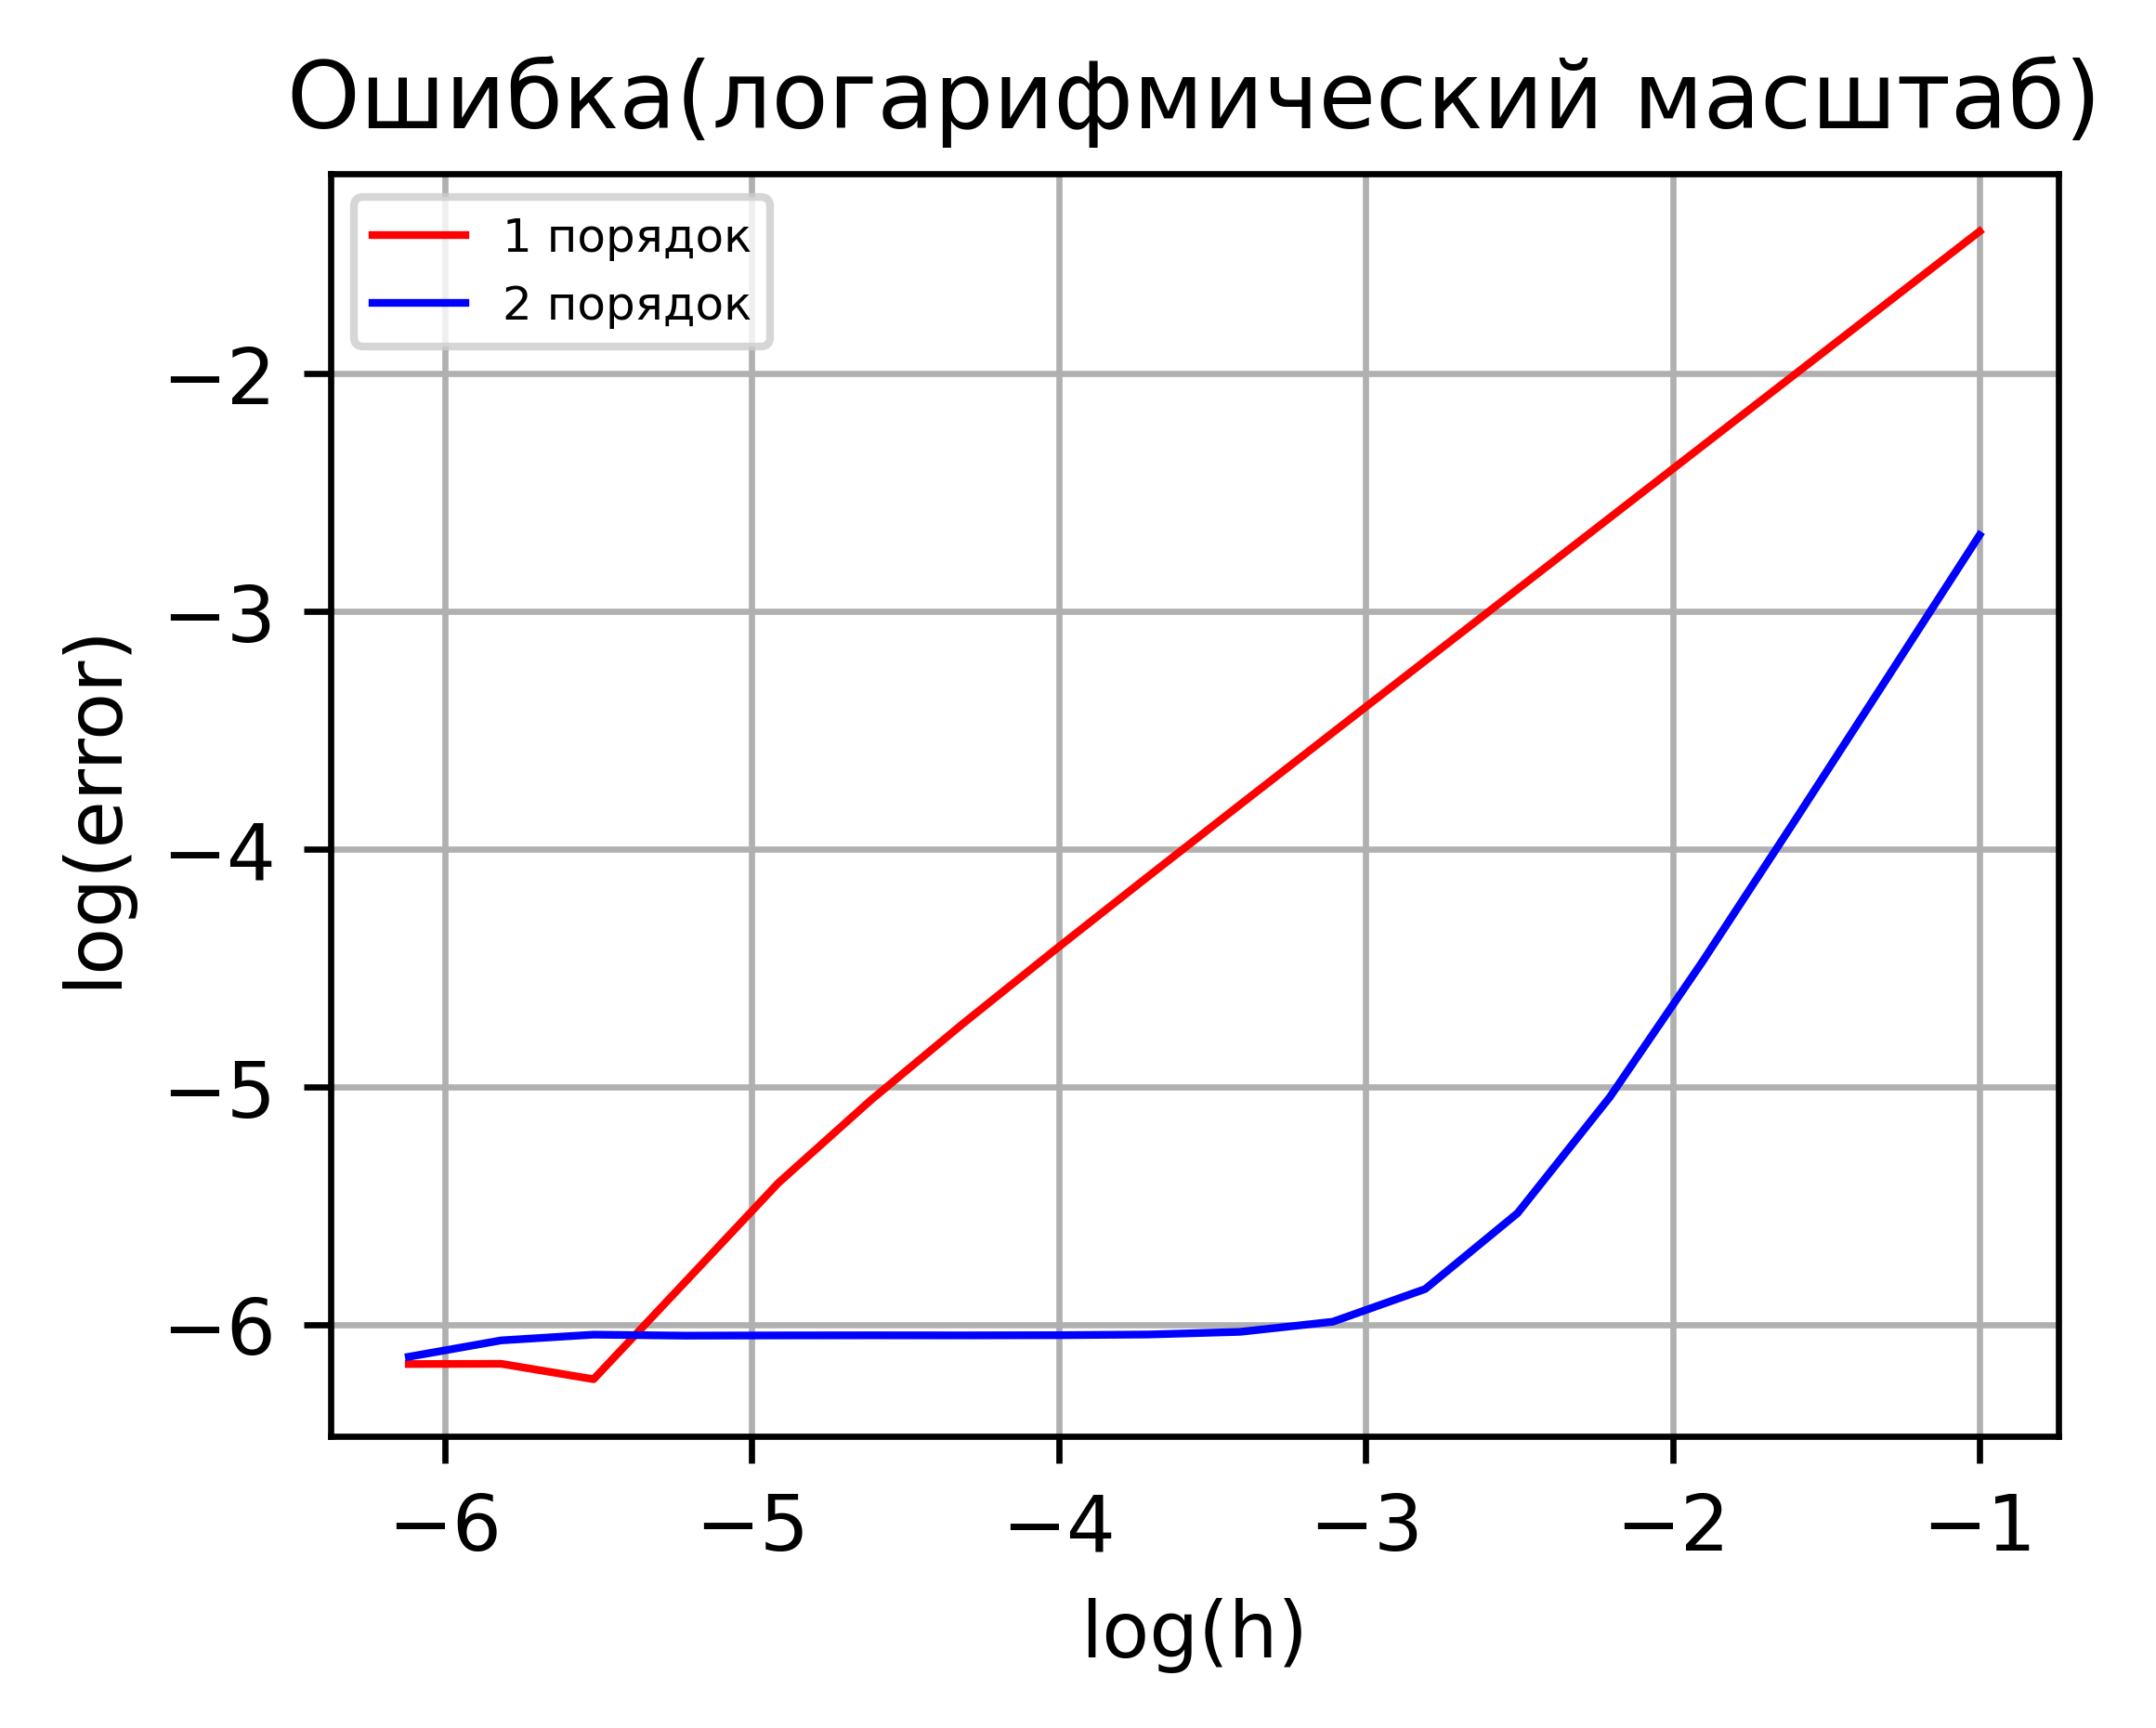

In [23]:
plt.figure(figsize = (4, 3),dpi = 600)

plt.plot(np.log10(np.array(h_lin)), np.log10(np.array(errors1)), c = 'r',\
         label = '1 порядок', lw = 1.)

plt.plot(np.log10(np.array(h_lin)), np.log10(np.array(errors2)), c = 'b',\
         label = '2 порядок', lw = 1.)

plt.xlabel('log(h)', fontsize=10.)
plt.ylabel('log(error)', fontsize=10.)
plt.legend(fontsize=6.)
plt.title(f'Ошибка(логарифмический масштаб)')
plt.grid()
plt.savefig("errors.jpg", dpi = 300)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


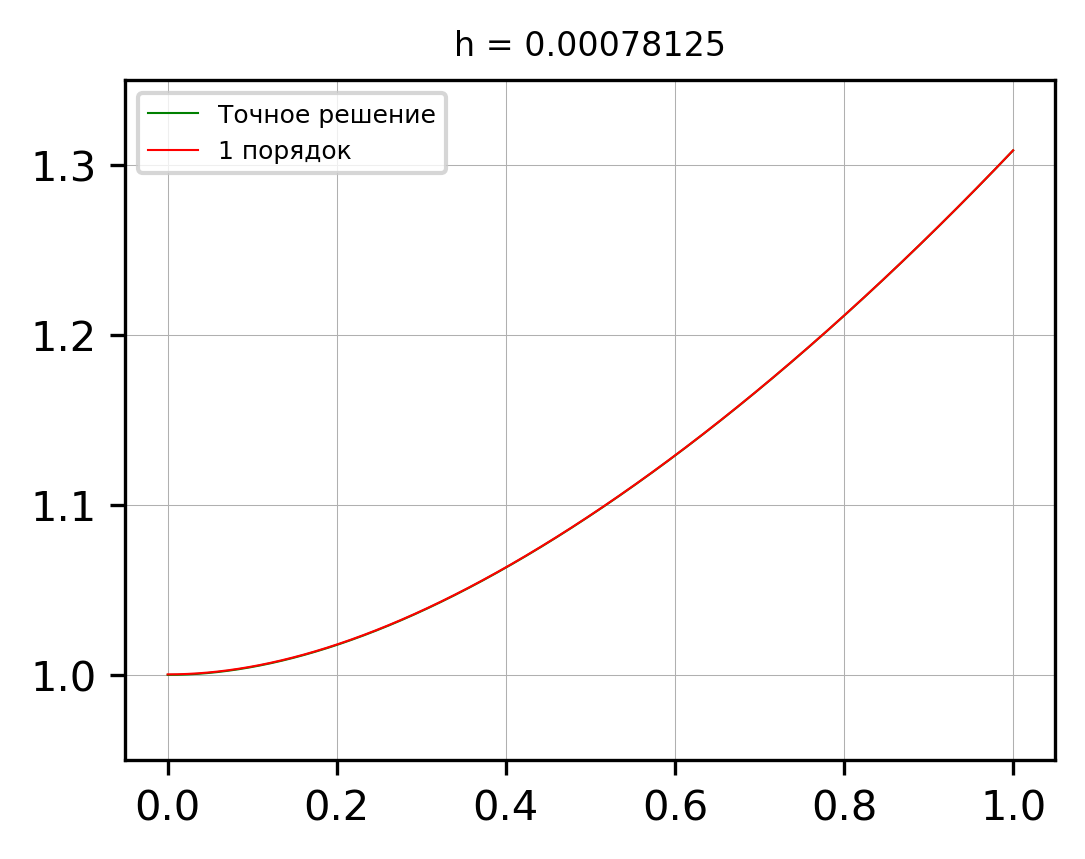

In [24]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (4, 3)

fig, ax = plt.subplots()

plt.grid(lw = 0.5)

def animate(i):
    ax.cla()
    h = h_lin[i]
    N = int((b - a)/h)
    x_vis = np.linspace(a, b, num = N + 1)
    ax.plot(x_vis, sol(x_vis), c = 'g', lw = 0.5, label = 'Точное решение')
    ax.plot(x_vis, progon_1(h), c = 'r', lw = 0.5, label = '1 порядок')
    ax.grid(lw = 0.25)
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(0.95, 1.35)
    ax.legend(fontsize=6.)
    ax.set_title(f'h = {h}', fontsize=8., loc = 'center')
    ax.set_xlabel('', fontsize=2.)
    ax.set_ylabel('', fontsize=2.)

anim = matplotlib.animation.FuncAnimation(fig, animate, frames=8)

anim.save('progonka.gif', fps = 2)